# Analyzing Portfolio Risk and Return

#### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options. To start your analysis, complete the following step:

* Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

Next, for each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

Finally, answer the following two questions:

* Which of the two portfolios seem more sensitive to movements in the S&P 500?

* Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?


### Import the Data

In [1]:
# Initial imports & inline plotting
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

In [2]:
# Import whale_navs.csv as whale_navs and set DateTimeIndex
whale_navs = pd.read_csv(
    Path("./Resources/whale_navs.csv"),
    index_col="date",
    parse_dates=True,
    infer_datetime_format=True
)

# Use .head() to verify import
whale_navs.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


In [3]:
# Find daily return values for the whale_navs dataframe and drop all NaNs
whale_navs_daily_returns = whale_navs.pct_change().dropna()

# Use .head() to verify changes
whale_navs_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


---

## Quantitative Analysis

The analysis has several components: performance, volatility, risk, risk-return profile, and portfolio diversification. You’ll analyze each component one at a time.

###  Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents.

<AxesSubplot:title={'center':'Daily Returns of the 4 Funds & the S&P 500'}, xlabel='date'>

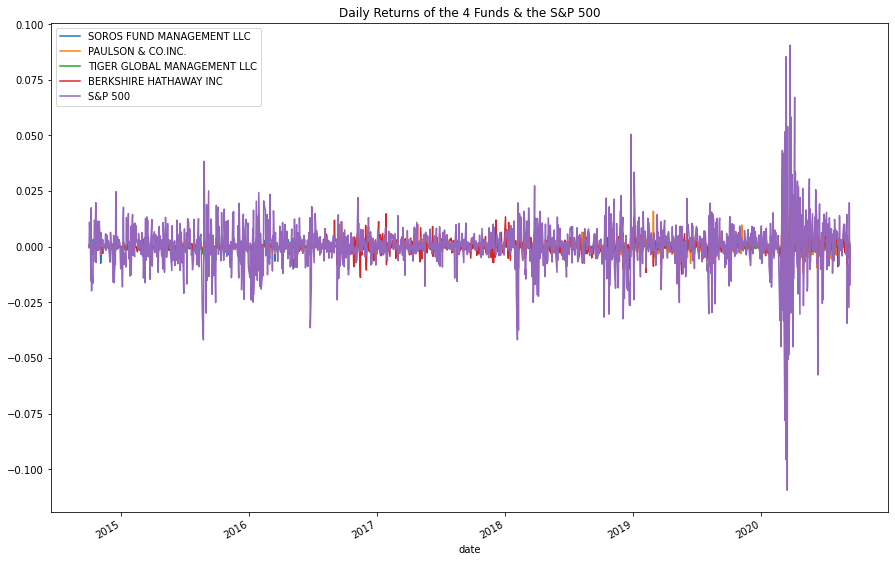

In [4]:
# Plot the daily return data of the 4 funds and the S&P 500
whale_navs_daily_returns.plot(title="Daily Returns of the 4 Funds & the S&P 500", figsize=(15, 10))

In [5]:
# Plot the cumulative returns of the 4 funds and the S&P 500
whale_navs_cumulative_returns = (1 + whale_navs_daily_returns).cumprod()

# Use .tail() to verify data
whale_navs_cumulative_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,0.999558,1.000150,1.000013,1.000171,1.000154
2014-10-03,1.000609,1.000518,1.000407,1.001420,1.011165
2014-10-06,1.003066,1.000510,1.000474,1.001688,1.009982
2014-10-07,1.000437,1.000193,1.000265,1.001100,0.994392
2014-10-08,1.000828,1.000563,1.000507,1.001943,1.011783
...,...,...,...,...,...
2020-09-04,0.987355,0.958187,1.055714,1.244856,1.762645
2020-09-08,0.985640,0.956378,1.054373,1.238608,1.714484
2020-09-09,0.986739,0.958409,1.057221,1.240858,1.748341


<AxesSubplot:title={'center':'Cumulative Returns of the 4 Funds & the S&P 500'}, xlabel='date'>

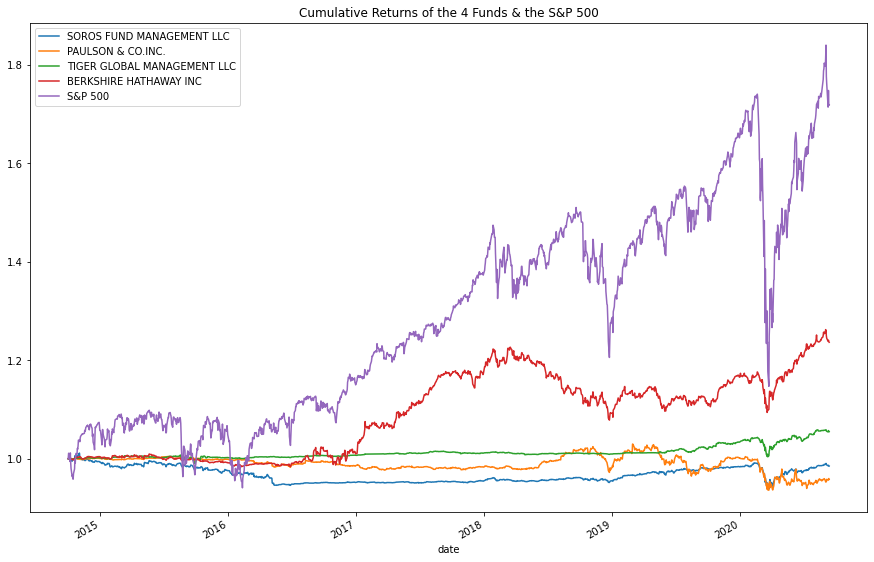

In [6]:
# Plot the cumulative returns of the 4 funds and the S&P 500
whale_navs_cumulative_returns.plot(title="Cumulative Returns of the 4 Funds & the S&P 500", figsize=(15, 10))

**Analysis**
---
Based on the cumulative return data and visualization, none of the four funds were able to outperform the S&P 500. One detail that stands out is the funds' lower levels of volatility compared to the S&P 500, but this came at the cost of reduced returns and, in some cases, losses.

---

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots.

<AxesSubplot:title={'center':'Daily Returns of the 4 Funds and the S&P 500'}>

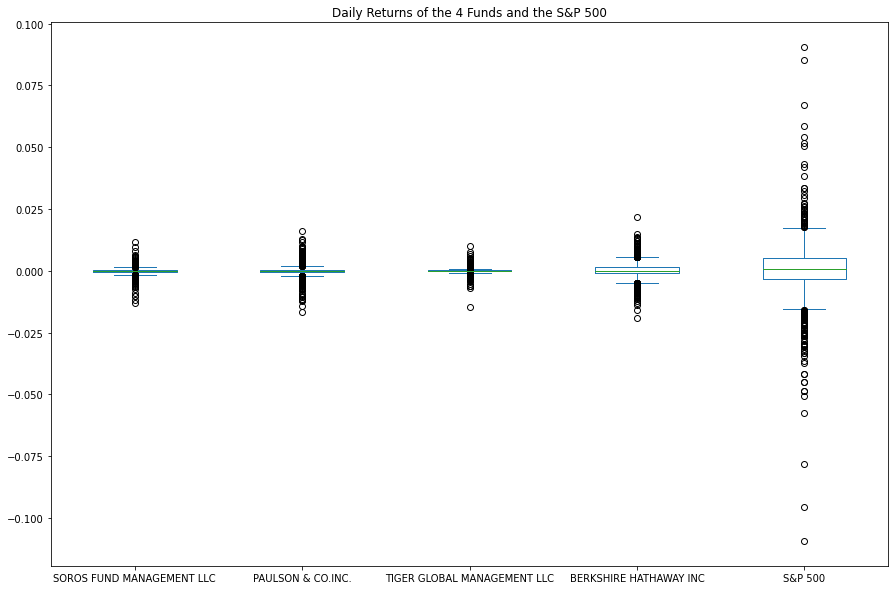

In [7]:
# Use the daily return data to visualize volatility of the 4 funds the the S&P 500
whale_navs_daily_returns.plot.box(title="Daily Returns of the 4 Funds and the S&P 500", figsize=(15, 10))

<AxesSubplot:title={'center':'Daily Returns of the 4 Funds'}>

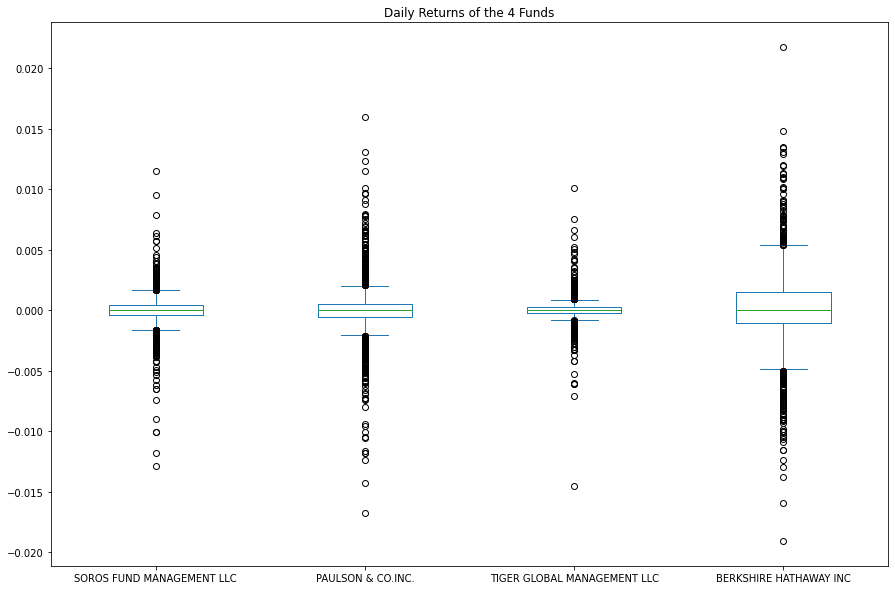

In [8]:
# Create a new dataframe of the funds' daily returns without the S&P 500
whale_navs_daily_returns_no_spy = whale_navs_daily_returns.drop(columns="S&P 500")

# Use the daily return data to visualize volatility of the 4 funds without the S&P 500
whale_navs_daily_returns_no_spy.plot.box(title="Daily Returns of the 4 Funds", figsize=(15, 10))

**Analysis**
---
Based on the box plot visualization of the four fund portfolios, we can see that the most volatile fund was Berkshire Hathaway Inc. while the least volatile was Tiger Global Management LLC. Berkshire Hathaway Inc. had the largest spread of all the funds and the farthest outliers. Tiger Global Management LLC. had the smallest spread and, with the exception of one outlier, had the tightest grouping of outliers.

---

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta.

In [9]:
# Calculate and sort the standard deviation for the 4 funds and the S&P 500
whale_navs_standard_deviation = whale_navs_daily_returns.std().sort_values()
whale_navs_standard_deviation

TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

In [10]:
# Define trading_days for use in calculations
trading_days = 252

# Calculate and sort the annualized standard deviation of the 4 funds and the S&P 500
whale_navs_annualized_standard_deviation = whale_navs_standard_deviation * np.sqrt(trading_days)
whale_navs_annualized_standard_deviation

TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

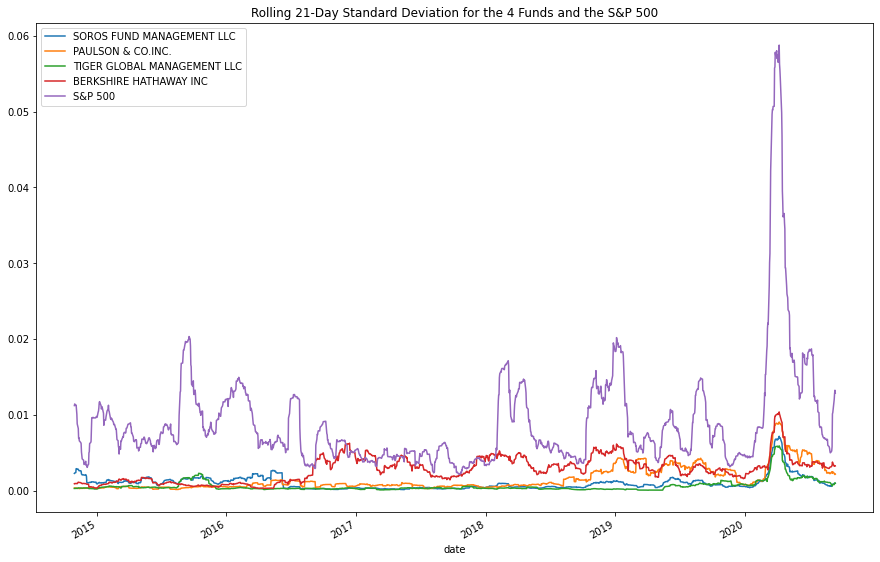

In [11]:
# Calculate and visualize the standard deviation with a 21-day rolling window
whale_navs_rolling_standard_deviation = whale_navs_daily_returns.rolling(window=21).std().plot(title="Rolling 21-Day Standard Deviation for the 4 Funds and the S&P 500", figsize=(15, 10))

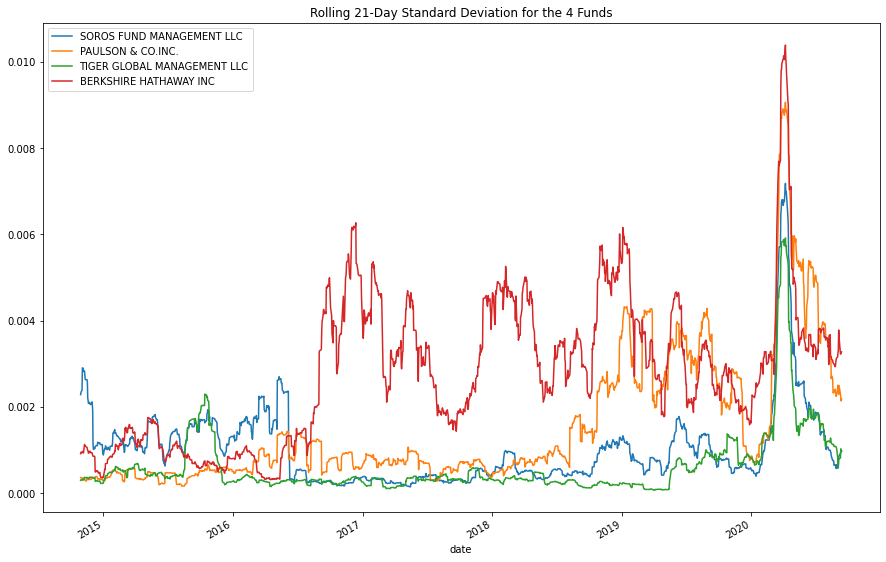

In [12]:
# Calculate and visualize the standard deviation with a 21-day rolling window
whale_navs_rolling_standard_deviation_no_spy = whale_navs_daily_returns_no_spy.rolling(window=21).std().plot(title="Rolling 21-Day Standard Deviation for the 4 Funds", figsize=(15, 10))

**Analysis**
---
1. Based on the annualized standard deviation, none of the portfolios pose more risk than the S&P 500. The second most risky portfolio, Berkshire Hathaway Inc., has an annualized standard deviation of 0.51692 whereas the S&P 500 has an annualized standard deviation of 0.183345, more than 3x higher than Berkshire Hathaway Inc., which is the riskiest option otherwise.

2. Based on the rolling metrics, there seems to be an increase in risk for each portfolio whenever the risk of the S&P 500 increases, primarily in the latter half of the visualization. The risk of the portfolios doesn't correlate too strongly with the risk of the S&P 500 until late 2018 when the portfolios begin to spike with the S&P 500, although not nearly as high. This shows that the overall market has an impact on the portfolios, but they still maintain a lower risk level relative to the market even during spikes in the rolling standard deviation.

3. Based on the rolling standard deviations of only the four fund portfolios, the riskiest portfolio available was Berkshire Hathaway Inc. for the majority of the time the data was recorded. From late 2015 to mid 2016, the risk of the portfolios were all relatively similar without a single portfolio being significantly more risky than another. In the later half of 2016 through the end of the recorded time periods, Berkshire Hathaway Inc. was the riskiest portfolio available, only occasionally being slightly below Paulson & Co. Inc., which begins to catch up in the later half of 2018.

---

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio.

In [13]:
# Calculate the annualized average returns and sort data
whale_navs_annualized_average_returns = (whale_navs_daily_returns.mean() * trading_days).sort_values()
whale_navs_annualized_average_returns

PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

In [14]:
# Calculate the annualized sharpe ratios and sort data
whale_navs_sharpe_ratios = (whale_navs_annualized_average_returns / whale_navs_annualized_standard_deviation).sort_values()
whale_navs_sharpe_ratios

PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios of the 4 Funds and the S&P 500'}>

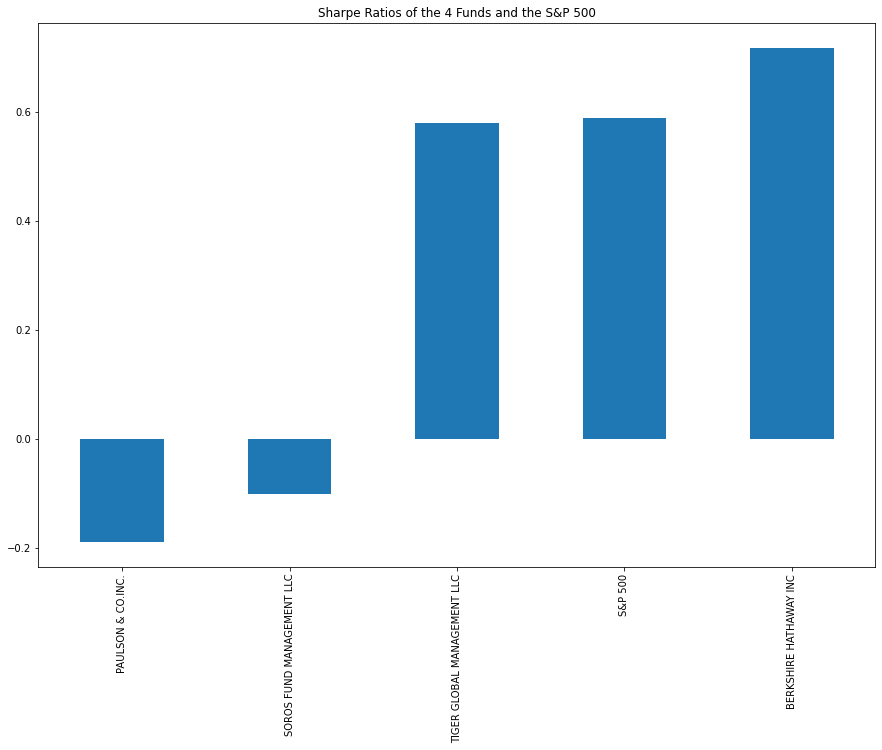

In [15]:
# Visualize the sharpe ratios of the 4 funds and the S&P 500
whale_navs_sharpe_ratios.plot.bar(title="Sharpe Ratios of the 4 Funds and the S&P 500", figsize=(15, 10))

**Analysis**
---    
Out of the four portfolios offered, the option that offers the best risk-return profile is Berkshire Hathaway Inc.. The portfolio that offers the worst risk-return profile is Paulson & Co. Inc..

---

### Diversify the Portfolio

In [26]:
# Calculate the variance of the S&P 500 using a rolling 60-day window
whale_navs_60_rolling_variance_spy = whale_navs_daily_returns["S&P 500"].rolling(60).var()

# Use .tail() to verify data
whale_navs_60_rolling_variance_spy.tail()

date
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, dtype: float64

**Berkshire Hathaway Inc.**

In [28]:
# Calculate the covariance of Berkshire Hathaway Inc. using a 60-day rolling window
whale_navs_berkshire_hathaway_covariance = whale_navs_daily_returns["BERKSHIRE HATHAWAY INC"].rolling(60).cov(whale_navs_daily_returns["S&P 500"])

# Use .tail() to verify data
whale_navs_berkshire_hathaway_covariance.tail()

date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64

In [29]:
# Calculate the beta using the 60-day rolling covariance compared to the S&P 500
whale_navs_berkshire_hathaway_beta = whale_navs_berkshire_hathaway_covariance / whale_navs_60_rolling_variance_spy

# Use .tail() to verify data
whale_navs_berkshire_hathaway_beta.tail()

date
2020-09-04    0.207879
2020-09-08    0.203051
2020-09-09    0.196632
2020-09-10    0.197543
2020-09-11    0.199411
dtype: float64

In [31]:
# Calculate the average of the 60-day rolling beta
whale_navs_berkshire_hathaway_beta_mean = whale_navs_berkshire_hathaway_beta.mean()
whale_navs_berkshire_hathaway_beta_mean

0.2214986101354593

<AxesSubplot:title={'center':'60-Day Rolling Beta of Berkshire Hathaway Inc.'}, xlabel='date'>

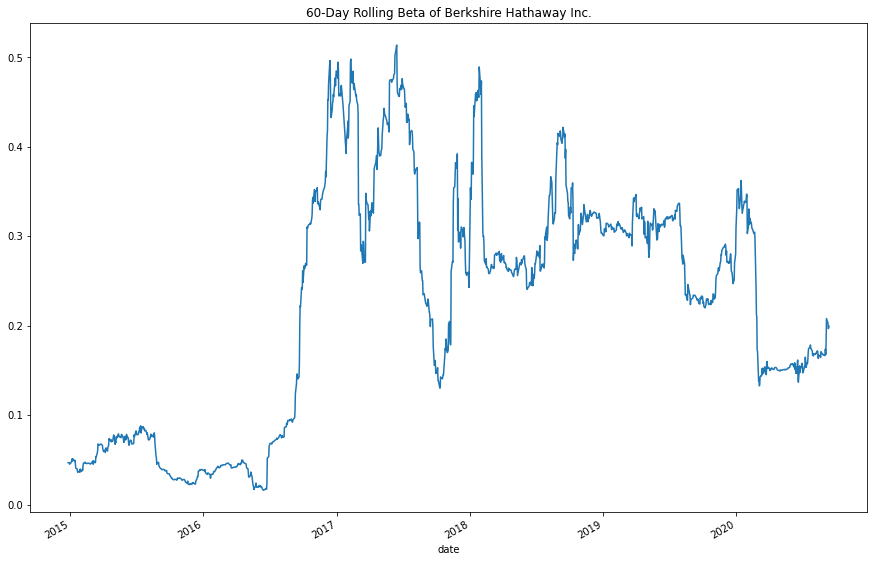

In [33]:
# Plot the rolling beta
whale_navs_berkshire_hathaway_beta.plot(title="60-Day Rolling Beta of Berkshire Hathaway Inc.", figsize=(15, 10))

In [34]:
# Calculate the covariance of Tiger Global Management LLC. using a 60-day rolling window
whale_navs_tiger_global_covariance = whale_navs_daily_returns["TIGER GLOBAL MANAGEMENT LLC"].rolling(60).cov(whale_navs_daily_returns["S&P 500"])

# Use .tail() to verify data
whale_navs_tiger_global_covariance.tail()

date
2020-09-04    0.000008
2020-09-08    0.000009
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

In [36]:
# Calculate the beta using the 60-day rolling covariance compared to the S&P 500
whale_navs_tiger_global_beta = whale_navs_tiger_global_covariance / whale_navs_60_rolling_variance_spy

# Use .tail() to verify data
whale_navs_tiger_global_beta.tail()

date
2020-09-04    0.081061
2020-09-08    0.076672
2020-09-09    0.079575
2020-09-10    0.080934
2020-09-11    0.081378
dtype: float64

In [37]:
# Calculate the average of the 60-day rolling beta
whale_navs_tiger_global_beta_mean = whale_navs_tiger_global_beta.mean()
whale_navs_tiger_global_beta_mean

0.03093001487238774

<AxesSubplot:title={'center':'60-Day Rolling Beta of Tiger Global Management LLC.'}, xlabel='date'>

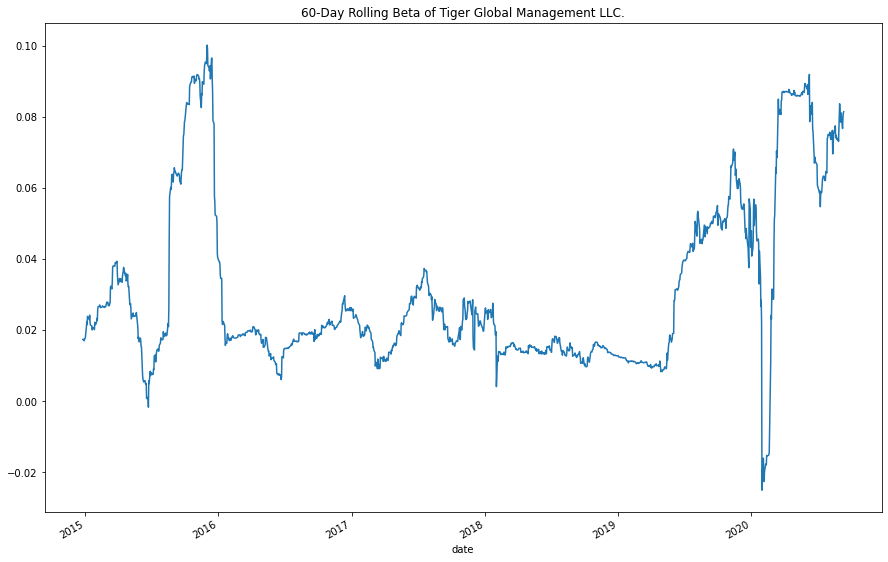

In [38]:
# Plot the rolling beta
whale_navs_tiger_global_beta.plot(title="60-Day Rolling Beta of Tiger Global Management LLC.", figsize=(15, 10))

**Analysis**
---
1. Berkshire Hathaway Inc. is more sensitive to movements in the S&P 500 as it has a higher mean rolling beta of 0.22149861 as opposed to Tiger Global Management LLC., which has a lower mean rolling beta of 0.03093001.

2. Of the two portfolios chosen, I would recommend Berkshire Hathaway Inc. as out of the chosen portfolios, it had the highest average annual returns of 0.037, which was only beaten by the S&P 500 at 0.108. On the other hand, Berkshire Hathaway's portfolio had the highest Sharpe Ratio at 0.718, which beat the S&P 500's 0.590. Berkshire Hathaway's portfolio is clearly the ideal choice between all the available portfolios based on it's average annualized returns, Sharpe Ratio, and mean rolling beta.

---